<a href="https://colab.research.google.com/github/aarmentamna/machine_learning_advance/blob/main/TC4033_Activity1b_42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Maestría en Inteligencia Artificial Aplicada**
##**Curso: ADVANCE MACHINE LEARNING METHODS**
###Tecnológico de Monterrey
###DR. José Antonio Cantoral Ceballos

## *Activity Week 2*
###**Implementing a Fully Connected Network for Kaggle ASL Dataset.**

*TEAMWORK:*

*   Roberto Romero Vielma - A00822314
*   José Javier Granados Hernández - A00556717
*   Aquiles Yonatan Armenta Hernandez - A01793252
*   Alan Avelino Fernández Juárez - A00989308

# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [1]:
# Unzip data from upladed zip file (Zip file from https://experiencia21.tec.mx/courses/424257/files/153089583/download?download_frd=1)
!unzip asl_data.zip -d './asl_data/'

Archive:  asl_data.zip
   creating: ./asl_data/asl_data/
  inflating: ./asl_data/asl_data/sign_mnist_train.csv  
  inflating: ./asl_data/asl_data/sign_mnist_valid.csv  


In [2]:
# Import Libraries
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


In [4]:
# Declare generated data path with extracted data from zip file
DATA_PATH = './asl_data/asl_data/'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [5]:
# Check header of the extrated data as Pandas dataframe
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
# Get and sort categories
sorted(train_df['label'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [7]:
# Extract and reshape the 784 vector to a 28 x 28 matrix. Training set.
x_train_num = train_df.loc[:, train_df.columns != 'label'].values.copy().reshape(-1, 28, 28)
x_train_num.shape

(27455, 28, 28)

In [8]:
# Extract label values. Training set.
y_train_num = train_df['label'].values.copy()
y_train_num.shape

(27455,)

In [9]:
# Extract and reshape images from vectors to 28 x 28 matrices. Validation set.
x_test_num = valid_df.loc[:, valid_df.columns != 'label'].values.copy().reshape(-1, 28, 28)
x_test_num.shape

(7172, 28, 28)

In [10]:
# Extract label values. Vaidation set.
y_test_num = valid_df['label'].values.copy()
y_test_num.shape

(7172,)

In [11]:
valid_df.shape

(7172, 785)

### Importar Images

In [12]:
# Cast data type tino np array
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
# Delete original data in dataframes
del train_df['label']
del valid_df['label']
# change data type for matrices to float32
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [13]:
x_train.shape

(27455, 784)

In [14]:
y_train.shape

(27455,)

In [15]:
# Transpose vector
y_train = y_train.reshape(-1, 1)
y_train.shape


(27455, 1)

In [16]:
# Transpose vector
y_val = y_val.reshape(-1, 1)
y_val.shape

(7172, 1)

In [18]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Create a function that will allow you to split the previously loaded validation set
    into valition and test.
    '''
    # Check for data and its classification to be the same length
    if len(x) != len(y):
        raise ValueError("Datos de entrada y las etiquetas deben tener la misma cantidad.")

    # Set the number of samples defined by input percentage
    num_test_samples = int(len(x) * pct)

    # Define indices from input data length in array format
    indices = np.arange(len(x))

    # Shuffle indices
    if shuffle:
        np.random.shuffle(indices)

    # Slice shuffled indices in the defined proportion
    val_indices = indices[num_test_samples:]
    test_indices = indices[:num_test_samples]

    # Assign proper indices for validation and testing
    x_val, y_val = x[val_indices], y[val_indices]
    x_test, y_test = x[test_indices], y[test_indices]

    return x_val, y_val, x_test, y_test

In [19]:
# Generate validation and test data sets
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [20]:
x_val.shape

(3586, 784)

In [21]:
y_val.shape


(3586, 1)

In [22]:
# Modify the set of alphabet characters to exclude j and z
alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

In [23]:
# Normalization function
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [24]:
# Normalization of all data sets
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [25]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

### Graficar muestras

In [26]:
# Plot function
def plot_number(image):
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

La imagen muestreada representa una: i


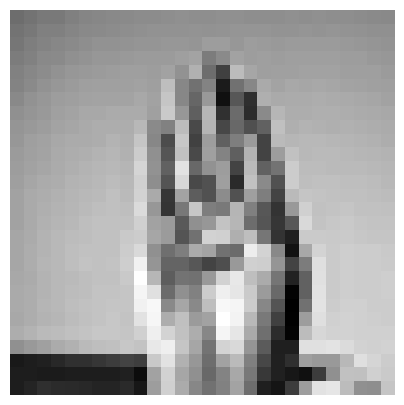

In [27]:
# Sample plot
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa una: {alphabet[int(y_test[rnd_idx])]}')
plot_number(x_test_num[rnd_idx])

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [28]:
# Minibatch generator OR Data sampler
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    # Check that input data is consistent in shape
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Nuestra clase Linear, ReLU y Sequential

In [29]:
# Custom class np_tensor to inherit from np.ndarray
class np_tensor(np.ndarray): pass

###  Clase Linear

In [30]:
# Class that with the evaluatino frunction of input and weights
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X):
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

In [31]:
# Activation function; Rectified Linear Function
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Clase Sequential

In [32]:
# Class that evaluates prediction and propagates corrections to weights and biases
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

In [33]:
# Evaluation function to convert ouptuts to probabilities; softMax
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis=0)
    preds = probs.copy()

    # Convierte y en un arreglo 2D con una sola columna
    y = y.reshape(1, -1)

    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size

    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # dl/dx
    x.grad = probs.copy()

    return preds, cost

### Loop de entrenamiento

In [34]:
# Training Loop
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

### Create your model and train it

In [35]:
# Evaluation metric; Accuracy
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(
            np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

In [40]:
# Model declaration with hyperparameters
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 24)])
mb_size = 512
learning_rate = 1e-4
epochs = 40

In [41]:
# Training function for the declared model
train(model, epochs, mb_size, learning_rate)

costo: 1.0320393122846248, accuracy: 0.5747350808700502
costo: 0.5183084826065344, accuracy: 0.6910206358059119
costo: 0.32361080961980754, accuracy: 0.724484104852203
costo: 0.21223343967518765, accuracy: 0.739542665923034
costo: 0.1526227237049537, accuracy: 0.7426101505856108
costo: 0.09712298707869514, accuracy: 0.7476296709425544
costo: 0.08162137436500781, accuracy: 0.7543223647518126
costo: 0.06314970393485533, accuracy: 0.7640825432236475
costo: 0.044370076258836814, accuracy: 0.7665923034021194
costo: 0.04822858971965294, accuracy: 0.7651979921918572
costo: 0.03465539218540888, accuracy: 0.7663134411600669
costo: 0.03202034959591823, accuracy: 0.769659788064696
costo: 0.027746707560017975, accuracy: 0.7685443390964863
costo: 0.02755041396614743, accuracy: 0.7724484104852203
costo: 0.02280810403406861, accuracy: 0.7721695482431679
costo: 0.023126591501260906, accuracy: 0.771611823759063
costo: 0.019017094007391856, accuracy: 0.7713329615170106
costo: 0.018296378186185205, accur

In [38]:
print(accuracy(x_test, y_test, mb_size))

0.7445621862799777


### Test your model on Random data from your test set

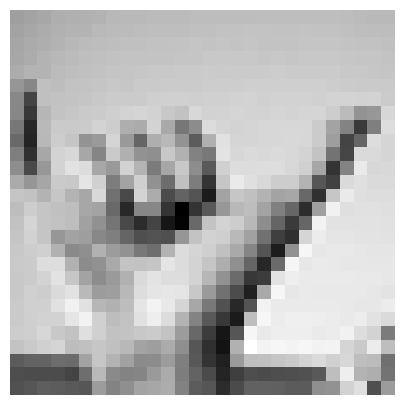

el valor predicho es: y el valor real es:y


In [39]:
# Pick a random sample, evaluate and show results vs actual classification
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[int(pred)]} el valor real es:{alphabet[int(y_test[idx])]}')